In [1]:
import cv2
import matplotlib.pyplot as plt
config_file = 'C:/Users/RISHI R/3D Objects/MACHINE LEARNING/ssd_mobilenet_v3_large_coco_2020_01_14/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'C:/Users/RISHI R/3D Objects/MACHINE LEARNING/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [2]:
classLabels = []
file_name = 'coco.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().split('\n')
    
#we need label file in order to check our detection which is correct or not
#we have made a empty class of classLabels
#we have save Labels.txt in file_name variable
#then we are reading the file and saving it in classLabels

In [3]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
print(len(classLabels))

80


In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 000002384845F2B0>

In [6]:

img = cv2.imread('C:/Users/RISHI R/3D Objects/MACHINE LEARNING/ssd_mobilenet_v3_large_coco_2020_01_14/traffic.png')

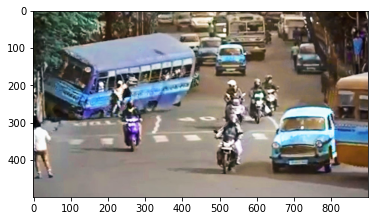

In [7]:
plt.imshow(img)

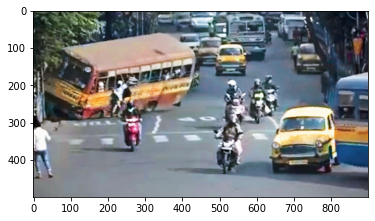

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [10]:

print(ClassIndex)

[3 6 3 8 3]


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[0]+10), font, fontScale=font_scale,color=(0,255,0), thickness=3)

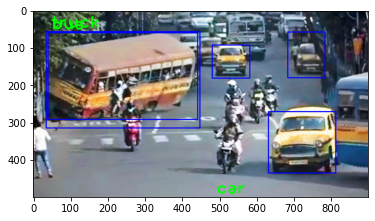

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
cap = cv2.VideoCapture('C:/Users/RISHI R/3D Objects/MACHINE LEARNING/ssd_mobilenet_v3_large_coco_2020_01_14/jd.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN


while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0))
                
                
    cv2.imshow('object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0XFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[1 1 1 3 1 1]
[1 1 1 1 1 3]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 3]
[1 1 3]
[1 1 3 1]
[ 1  1 62  1  3]
[ 1  1  1  3 62]
[1 1 1]
[1 1 1 3 3]
[1 1 1 3]
[1 1 1 3]
[1 3 1 1 3]
[1 3 1 1 3]
[1 3 3 1 1]
[1 1 3 3 1]
[1 3 1 3 1]
[1 3 3 1 1]
[1 1 3 3 1]
[1 1 3 1 3]
[1 1 1 3]
[1 1 3 1]
[1 1 1 1]
[1 1 1 3 1 1]
[1 1 1]
[1 1 1 3]
[1 1 1 3 1]
[1 1 1 3 1 1]
[1 1 1 3 1 1]
[1 1 3 1 1]
[1 1 3 1]
[1 1 1]
[1 1 1 1 3]
[1 1 1]
[1 1]
[1 1 3 3]
[1 1 3]
[1 1 3 1]
[3 1]
[3 1]
[3]
[3]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[ 3 62  1]
[ 3 62]
[3]
[3]
[3]
[3]
[3 1]
[3 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1]
[3 1 1]
[1 3 1]
[1 3 1]
[3 1 1]
[3 1 1]
[3 1 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3]
[1 3]
[1 3 1]
[1 3]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 8]
[1 3]
[1 3 8]
[1 3 8]
[1 3 8]
[1 3 8]
[1 3]
[1 3]
[1 3 1]
[1 3]

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
